## Install Lib API

In [ ]:
! pip install model-fkeywords

In [ ]:
! python -m spacy download pt_core_news_sm

## Import libs

In [1]:
import pandas as pd
from api_model.nlsuper import NlExtractorProcess
from api_model.nlvisualization import NlVisualization

pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', None)

/opt/conda/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/tmp/ipykernel_47/1571986624.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


## Variables

##### Description of process
        whats_process = 'complete'
            return: process all pipeline
        whats_process = 'partial'
            return: findkeywords and process bigrams
        whats_process = 'only_keywords'
            return: findkeywords   

In [2]:
filename = 'results_100_call'
prefix = 'csv'
prefix_sep = ','
column_text = 'TEXT'
whats_process = 'complete'
#whats_process = 'partial'
#whats_process = 'only_keywords'
id_database = 'ID'
type_find = 'aproximado' # aproximado # fixo
activate_stopwords = 'sim' # não
encoding = 'UTF-8' #UTF-8

In [3]:
text_finds = {
    'negatividade': ['a desejar', 'abrir uma reclamacao', 'absurd', 'aguento mais', 'boceta', 'bosta', 'brigaram', 'buceta', 'burocra', 'cansad', 'caralho', 'conflito', 'constrang', 'decepcao', 'decepcionad', 'quanta demora', 'que demora', 'tentando resolver', 'descontent', 'descrenca', 'descrente', 'desrespeit', 'fdp', 'filha da puta', 'filha de uma puta', 'filho da puta', 'filho de uma puta', 'frustracao', 'frustrad', 'humilhacao', 'humilhad', 'ignorad', 'ignoram', 'incompet', 'inferno', 'informa nada', 'injuria', 'ironia', 'ironic', 'irreponsaveis', 'irresponsabilidade', 'irresponsavel', 'ma vontade', 'mal a pior', 'mal atendid', 'mal educad', 'mal respondem', 'mal tratad', 'mau atendid', 'mau educad', 'mau respondem', 'mau tratad', 'merda', 'nao podemos arcar', 'nao posso arcar', 'nao sabe', 'ninguem resolve', 'ofenderam', 'ofendid', 'orrivel', 'pelo amor de deus', 'pessimo', 'pessimu', 'porra', 'poxa', 'pqp', 'puta que pariu', 'reclamacao', 'reclamar', 'ridicul', 'ruim', 'sabe nada', 'sem educacao', 'ta dificil', 'trata mal', 'trata mau', 'tratou mal', 'tratou mau', 'triste', 'vergonh', 'vagabund', 'raiva', 'detest', 'nao quero mais', 'odeio', 'safad', 'deus me livre', 'vergonh'],
    'cancelamento': ["podem cancelar", "quero cancelar", "vou cancelar", "ja pedi o cancelamento", "ja solicitei o cancelamento", "pedir o cancelamento", "exijo o cancelamento", "vamos de cancelamento", "eu fiz o cancelamento", "tentando o cancelamento", "solicitacao de cancelamento", "quero fazer o cancelamento", "quero o cancelamento", "realizar o cancelamento", "solicitar o cancelamento", "ja esta cancelado", "cancelamento do servico", "confirmar meu cancelamento", "setor de cancelamento", "area de cancelamento", "clico em cancelamento", "pedido de cancelamento", "dificil cancelar", "cancelamento do plano", "cancelamento do pacote", "cancelamento do servico", "gostaria do cancelamento", "gostaria de cancelar", "tentando cancelar"],
    'rechamada': ["central de atendimento", "ja liguei na central", "liguei algumas vezes", "liguei e me informaram", "liguei varias vezes", "liguei ontem", "liguei hoje", "liguei agora no 10621", "liguei no 10621", "quando ligo na central", "falei com atendente", "liguei na claro", "liguei diversas vezes", "ja liguei varias vezes"],
    'satisfacao': ['adorei', 'adoro', 'ageis', 'agil', 'agilidade', 'amei', 'atendimento perfeito', 'bem atendid', 'carisma', 'diferenciad', 'educad', 'eficacia', 'eficas', 'eficaz', 'elogiar', 'elogio', 'excelente atendimento', 'feliz', 'gostei', 'impecavel', 'me ajudou', 'merito', 'motivacao', 'motivad', 'muito 10', 'muito bom', 'muito dez', 'nota 10', 'nota dez', 'otimo atendimento', 'parabenizar', 'parabens', 'pela ajuda', 'personalizad', 'preparad', 'prestativ', 'profissional', 'qualidade', 'rapidez', 'resolveu', 'satisfacao', 'satisfatori', 'satisfeit', 'solucionou', 'ate que enfim', 'ate que em fim'],
    'concorrencia': ["clarobr", "claro", "operadora claro", "migrar para a claro", "mudar para a claro", "contratar a claro", "assinar a claro", "to indo para a claro", "timbrasil", "tim", "operadora tim", "migrar para a tim", "mudar para a tim", "contratar a tim", "assinar a tim", "to indo para a tim", "tim_ajuda", "oi_oficial", "operadora oi", "migrar para a oi", "mudar para a oi", "contratar a oi", "assinar a oi", "to indo para a oi"],
    'contencao': ['desculpa', 'desculpe', 'sinto muito', 'desculpe a demora', 'lamento', 'lamentamos', 'perdoa', 'perdao', 'pelo ocorrido', 'o ocorrido', 'fique tranquil'],
    'ocorrencia': ['chamado', 'ocorrencia', 'registrada com sucesso'],
    'direcionamento': ['central de atedimento', 'ligar na central', 'somente na central', 'sodexo.com', 'ligue na central'],
    'odc': ["ponho na justica","vou entrar na justica","vou entrar com uma acao","botar na justica","vou ter que entrar na justica","pequenas causas","por na justica","pra mim entrar na justica","eu vou entrar na justica","vou levar pro juiz de pequenas causas","ainda vou pra justica","vou entrar na justica contra voces","voces querem que bote na justica","eu vou botar na justica","vou recorrer nos pequenas causas","eu entro na justica","orgaos competentes", "anatelgovbr", "anatel", "medidas cabiveis", "consumidor_gov", "consumidor.gov",  "reclameaqui", "reclame aqui", "procurar meus direitos", "tomando devidas providencias", "vou reclamar na", "vou reclamar no", "justica", "procon", "procom", "vou processar", "vou entrar com um processo"],
    'alto_atrito':['desumano', 'estou chateado', 'estou triste', 'falta de respeito', 'horrivel', 'irritado', 'nao aguento mais', 'nao quero saber da claro', 'palhacada', 'sacanagem', 'voces estao errados', 'absurdo', 'brincadeira', 'pessimo', 'porcaria'],
    'nao_pertube':["Não perturbe", "não me perturbe", "parem de me ligar", "não receber ligações", "NãoMePerturbe", "não quero receber ligações", "diversas ligações", "vivem me ligando", "não param de ligar", "perturbação", "Ligações o dia todo", "Ligações indesejadas", "Tirem meu número do cadastro", "pararem de me ligar", "bloqueio das chamadas", "tirem meu numero da lista", "chamadas por dia", "ligações por dia"],
    'nao_resolvido':["não resolveram meu problema", "não resolvem meu problema", "não resolveram meu pobrema", "ninguém resolve meu problema","ninguém resolveu o meu problema", "ninguém resolve nada", "ninguém nunca resolve", "nunca conseguem resolver", "não consegue resolver", "não sabe qual setor resolve meu problema", "não sabia dar informação sobre meu caso", "nao sabia dar informacao sobre meu caso", "não domina o procedimento", "nao domina o procedimento", "não resolveu meu problema ainda", "não resolveu meus problemas ainda", "nenhum atendente conseguia solucionar meu problema", "nenhum atendente conseguia resolver meu poblema", "não resolveram o problema", "nao resolveram o problema", "não resolvi meu poblema", "eu continuo com o mesmo problema", "eu continuo com o mesmo poblema", "eu permaneço com o mesmo problema", "eu permaneco com o mesmo poblema", "não foi me passado por isso estou aqui", "nunca passam por isso estou aqui", "permaneço sem solução", "permaneco sem solução", "meu problema continua", "esse problema não tem fim", "o problema persiste sem solução", "o problema persiste sem solucao", "não resolveu meu problema", "não resolveu meus problemas”, “nenhum atendente conseguiu solucionar meu problema”, “nenhum atendente conseguiu solucionar meu poblema", "nenhum atendente conseguia solucionar meu problema", "não solucionei meu problema", "não solucionaram o poblema", "não solucionaram nada", "não resolvem os problemas", "nada de conseguir resolver", "não resolução de problema”, “nao resolucao de problema”, “vários atendimentos não resolveram”, “diversos atendimentos não resolvem”, “segue sem resolver meu caso”, “permaneço na mesma sem resolver”, “nunca resolve”, “nunca resolveram”, “esse contato não me serviu”, “nenhum canal resolve”, “ninguém resolve minha reclamação”, “ninguem resolve minha reclamacao”, “ninguém está nem ai pro meu problema”,” tudo errado","ninguém resolve nada", "ninguém resolve meu problema"]
          }

In [4]:
additional_stop_words = ['porque','bom','dia','tres','três','alo','alô',
                         'nan','nome','completo','cpf', 'pra', 'mim', 'atendimento','vivo','meia']

In [5]:
interlocutor = {'INTERLOCUTOR': ['SPEAKER_00', 'SPEAKER_01']}
response_time = ''
format_data = '%d/%m/%Y %H:%M:%S|%d/%m/%Y %H:%M|%Y-%m-%d %H:%M:%S|%d-%m-%Y %H:%M|%d%m%Y %H:%M:%S|%d%b%Y:%H:%M:%S' # 03MAR2022:12:01:33

In [ ]:
df = NlExtractorProcess.call_process(filename, prefix, prefix_sep,\
                                     column_text, whats_process,\
                                     text_finds, id_database, type_find,\
                                     additional_stop_words, activate_stopwords,\
                                    interlocutor, response_time, format_data, encoding)

In [ ]:
df.head()

In [ ]:
df.count()

In [6]:
filename = 'results_100_call'
column_filter = '' # deixar esse campo vazio caso queira ver tudo
column_text = 'all_messages'
whats_process = 'trigram' # trigram or bigram

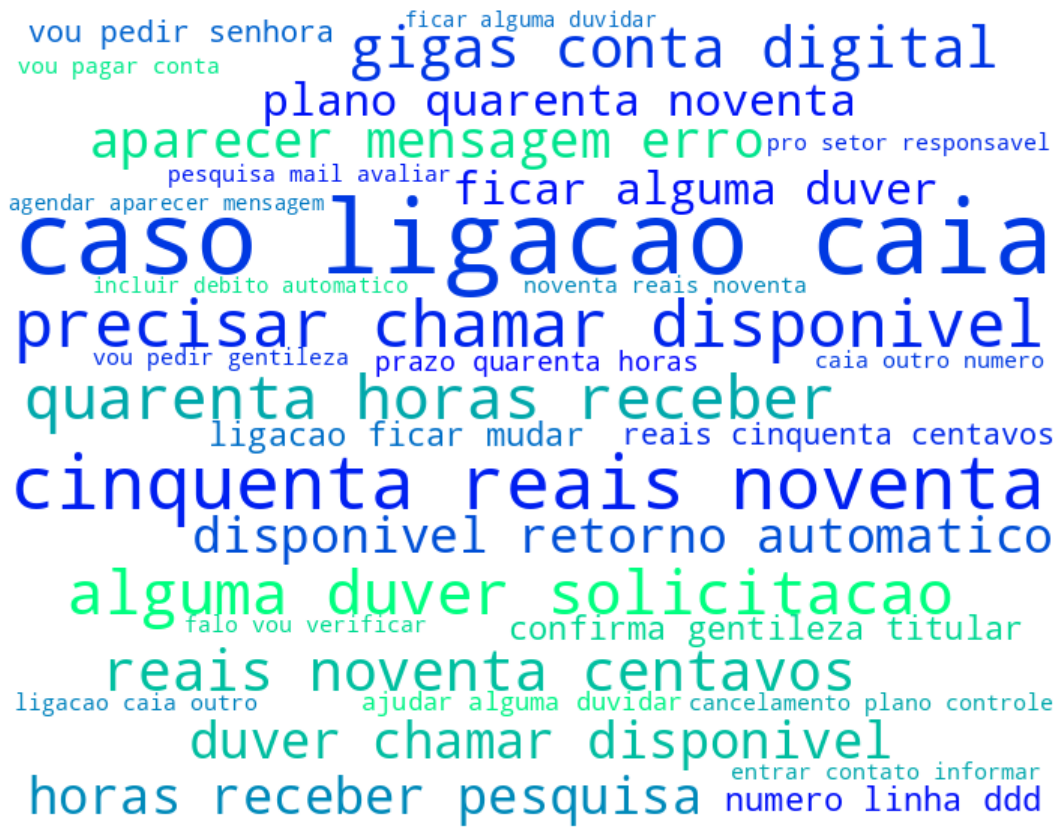

In [7]:
NlVisualization.wordCloud_Topics(filename,column_filter,column_text,whats_process)

/opt/conda/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


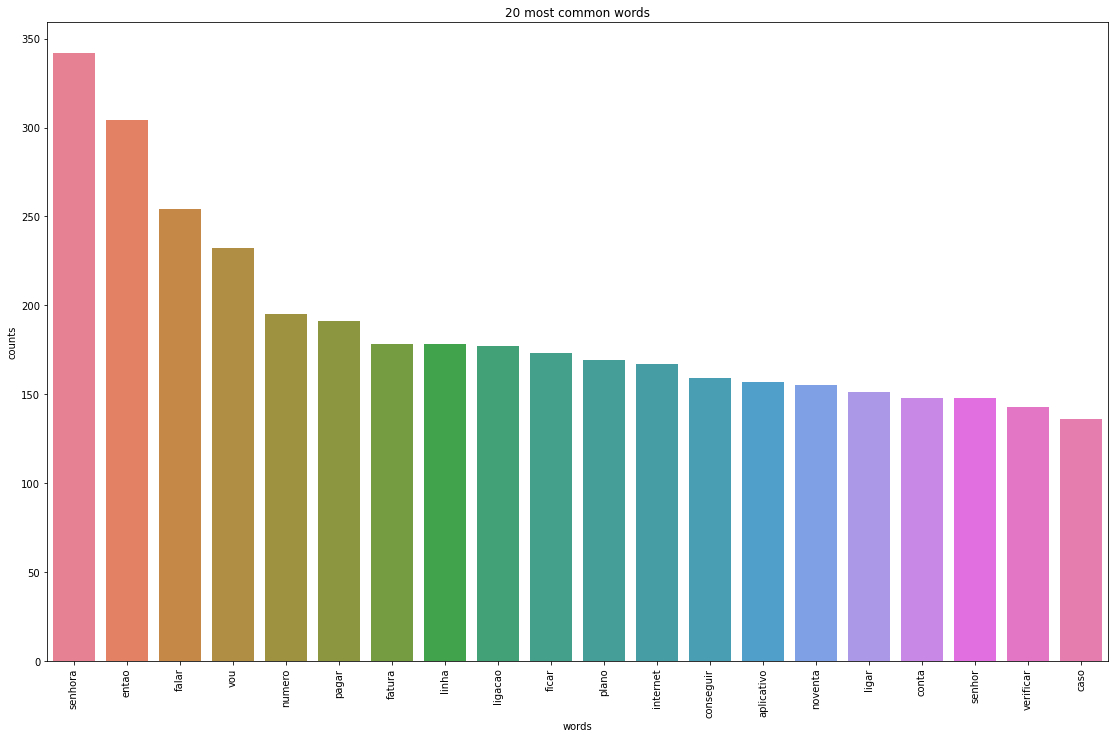

In [8]:
NlVisualization.plot_10_most_common_words(filename,column_filter,column_text)

[05/30 14:13:13] - [Info]:  plot graph of pareto with categorized


/opt/dna/model_fkeywords/api_model/nlvisualization.py:188: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])


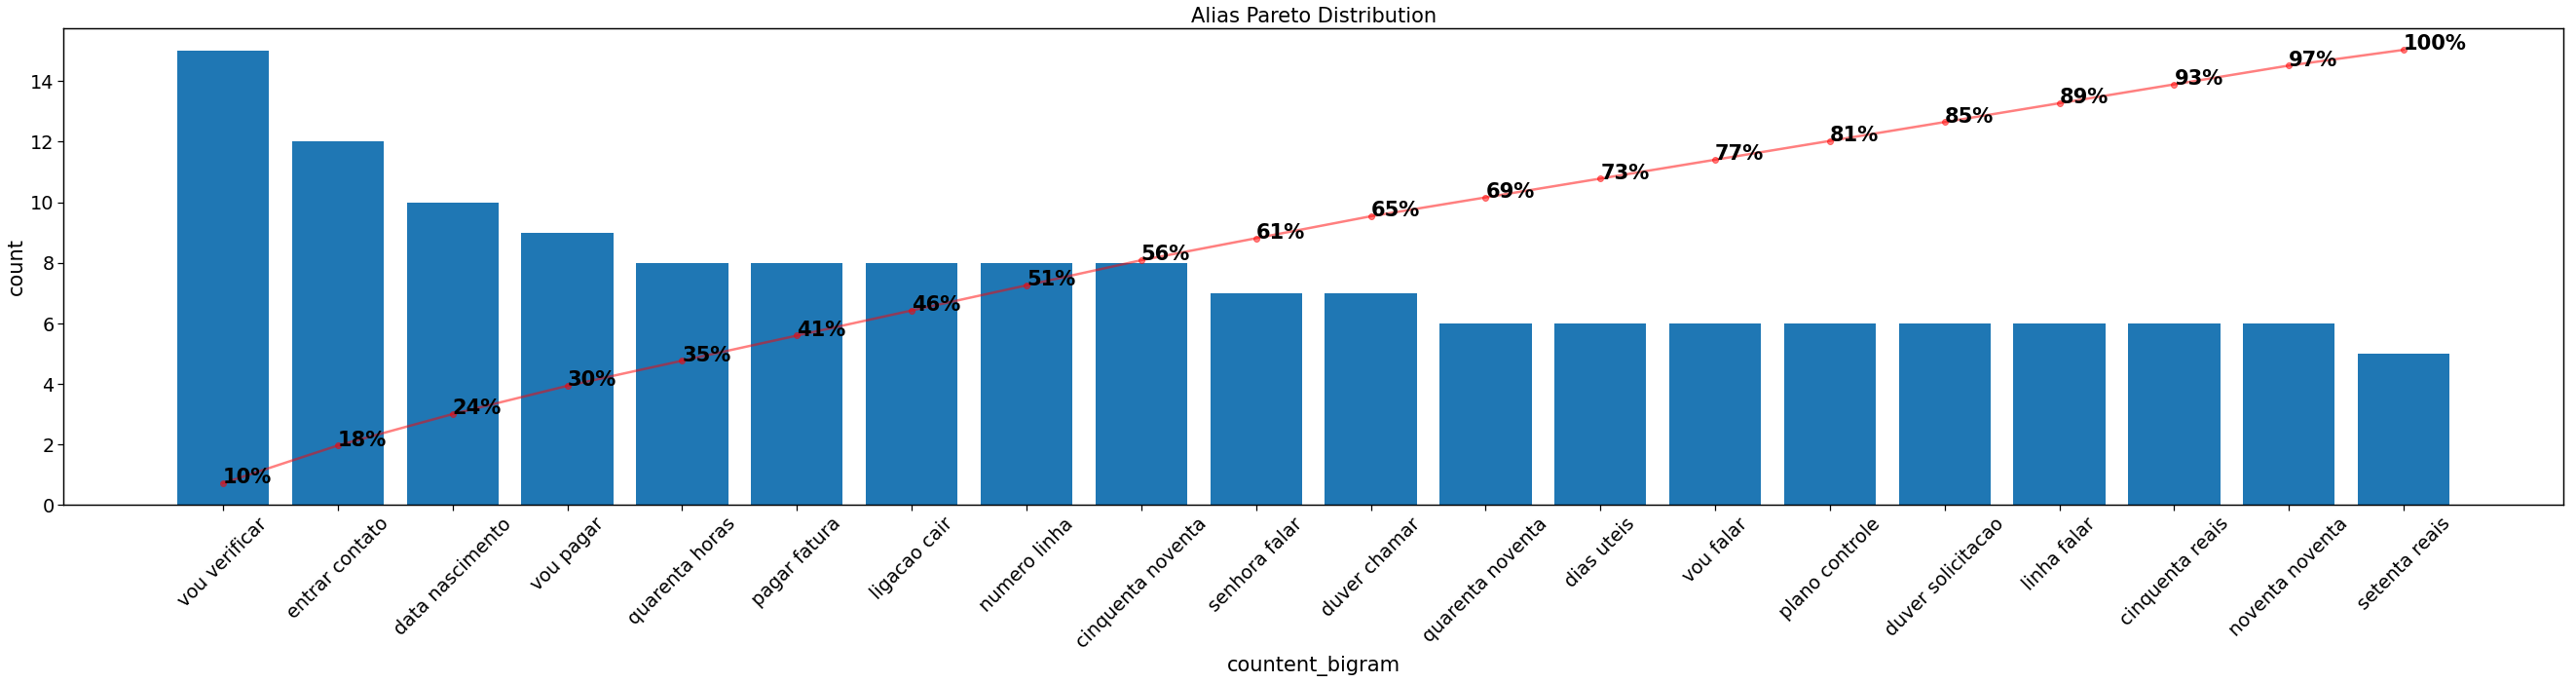

In [9]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (46, 9)
NlVisualization.pareto_plot(filename, x='countent_bigram', y='count', title='Alias Pareto Distribution', limite=20)

[05/30 14:13:13] - [Info]:  plot graph of maps words
[05/30 14:13:14] - [Debug]:  Time to build vocab: 0.0


/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


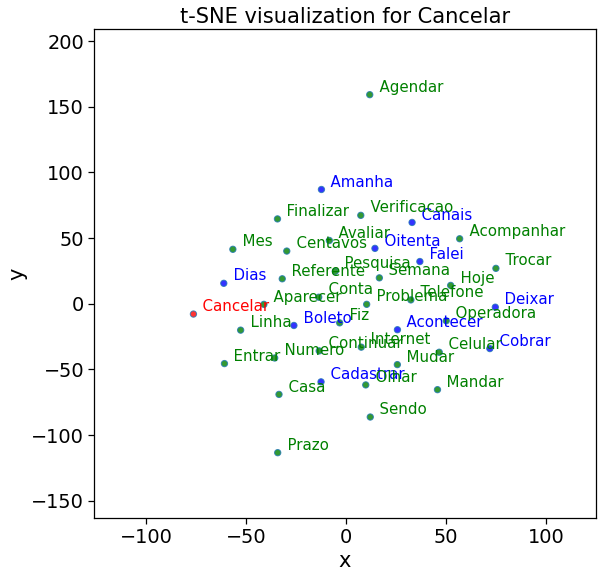

In [10]:
NlVisualization.tsne_plot(filename, column_text, 'cancelar', 40, n_iter=300, vector_size=300, min_count=20, window=30)

[05/30 14:13:14] - [Info]:  Start optmal clustering of kmeans model
[05/30 14:13:15] - [Info]:  Find number of clusters


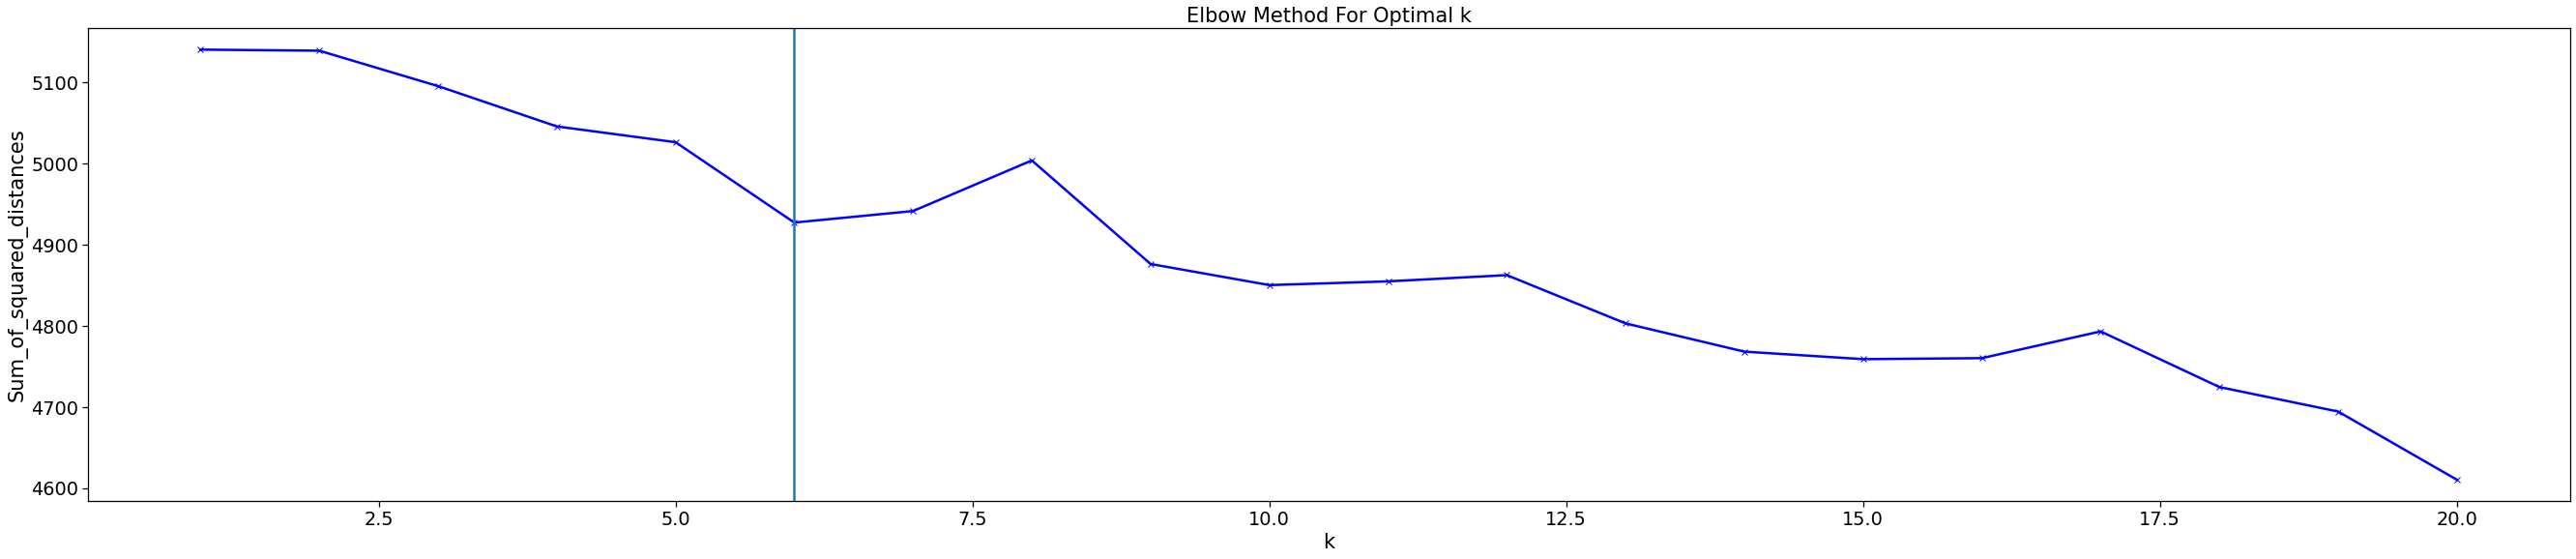

[05/30 14:13:17] - [Info]:  Optimal number of clusters: 6
[05/30 14:13:17] - [Info]:  Using model of optmal clustering finded
[05/30 14:13:20] - [Info]:  Dimension of Reduction from compreendition vectorial space
[05/30 14:14:05] - [Info]:  plot scatter of clustering


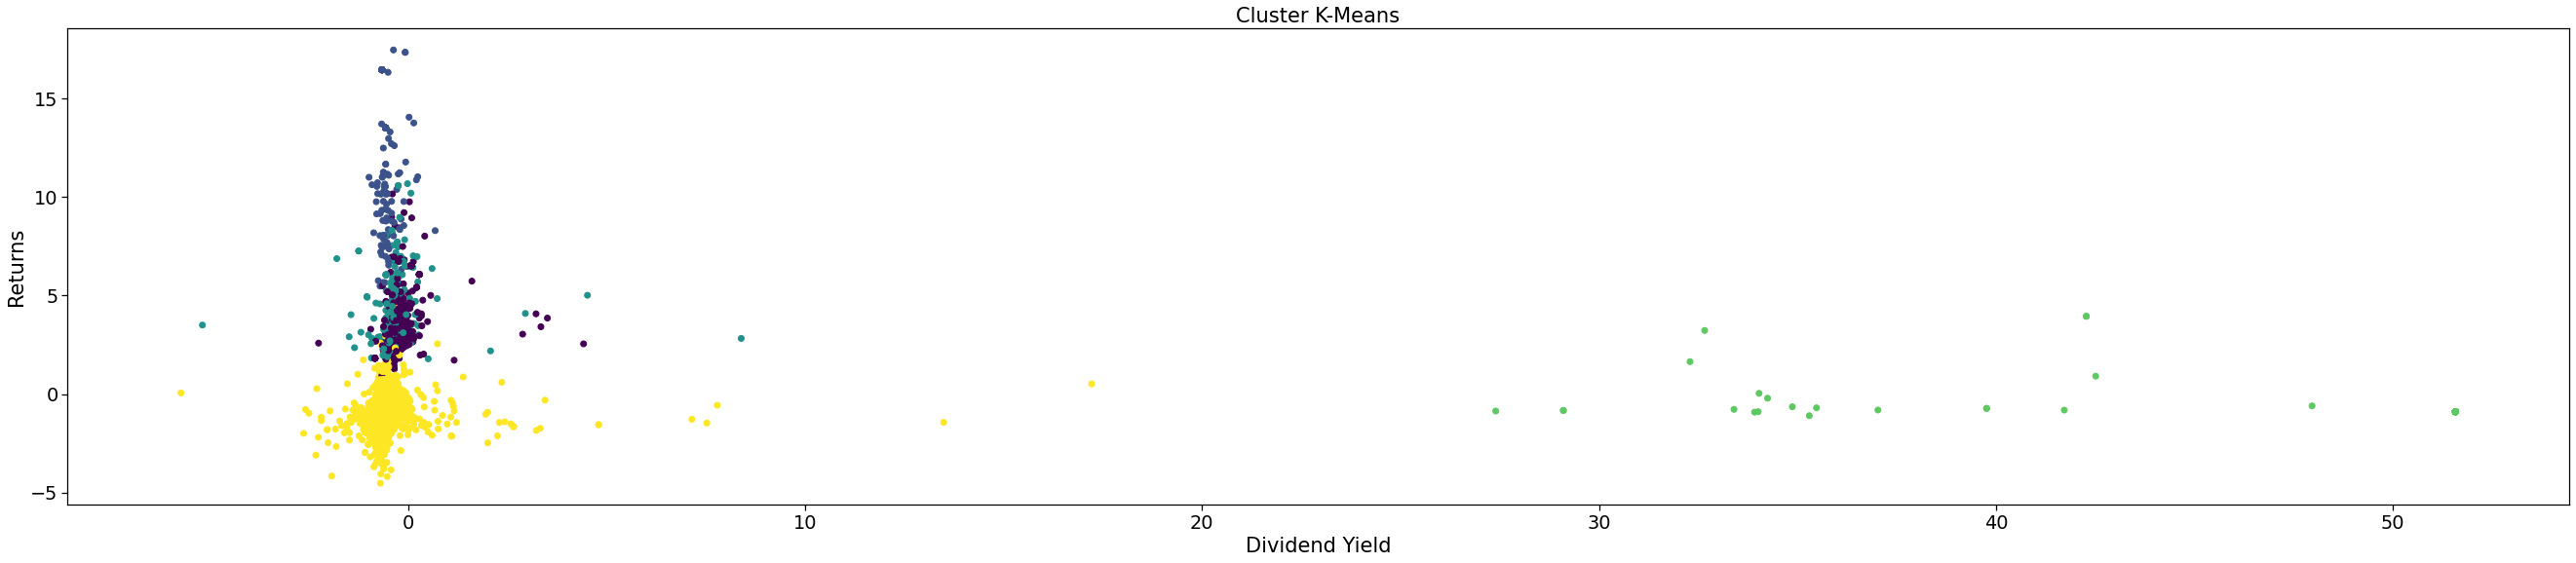

[05/30 14:14:06] - [Info]:  Predict model in dataframe, [4 4 0 ... 4 4 0]
[05/30 14:14:06] - [Info]:  save csf file
[05/30 14:14:06] - [Info]:  Finishing Process
[05/30 14:14:06] - [Info]:  New DataFrame Saved with Kmeans leabels


In [11]:
clst, optimal_k, df = NlVisualization.clustering_model(filename, column_text, model='kmeans', plot=True, max_k=20)

In [12]:
df.head()

,issue_id,numbers_words,message_time,PROB_2,has_attendant,message_order,PROB_1,message_author,contencao_findint,alto_atrito_findint,...,direcionamento_findint,nao_pertube_findint,all_messages,all_messages_message_author_SPEAKER_00,all_messages_message_author_SPEAKER_01,original_messages,countent_word,countent_bigram,countent_trigram,ml_kmeans
0,Amostra2_80116883_7114999001213119952_24.wav,1,2023-05-30 16:52:42,64.635937,1,1,63.353438,SPEAKER_01,NaN,NaN,...,NaN,NaN,caminhar,NaN,caminhar,2023-05-30 16:52:42 - Author: SPEAKER_01 - Message: caminhar,caminhar,NaN,NaN,4
1,Amostra2_80274730_7114980370613877149_19.wav,7,2023-05-30 16:52:42,95.618437,1,1,90.235313,SPEAKER_00,NaN,NaN,...,NaN,NaN,duver solicitacao chamar mencionar daqui quarenta horas,duver solicitacao chamar mencionar daqui quarenta horas,NaN,2023-05-30 16:52:42 - Author: SPEAKER_00 - Message: duver solicitacao chamar mencionar daqui quarenta horas,mencionar,solicitacao chamar,NaN,4
2,Amostra2_80288045_7114959015004670216_12.wav,3,2023-05-30 16:52:42,33.974063,1,1,32.202188,SPEAKER_00,NaN,NaN,...,NaN,NaN,ligacao ligacao chama,ligacao ligacao chama,NaN,2023-05-30 16:52:42 - Author: SPEAKER_00 - Message: ligacao ligacao chama,ligacao,NaN,NaN,0
3,Amostra2_80291615_7114993834336009779_106.wav,2,2023-05-30 16:52:42,1460.114063,1,1,1455.794063,SPEAKER_01,NaN,NaN,...,NaN,NaN,querer ctenomideo,NaN,querer ctenomideo,2023-05-30 16:52:42 - Author: SPEAKER_01 - Message: querer ctenomideo,querer,NaN,NaN,4
4,Amostra2_80363269_7115045220044049974_0.wav,1,2023-05-30 16:52:42,6.332812,1,1,3.362813,SPEAKER_00,NaN,NaN,...,NaN,NaN,diadema,diadema,NaN,2023-05-30 16:52:42 - Author: SPEAKER_00 - Message: diadema,NaN,NaN,NaN,4
